In [1]:
# imports
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import math
import os
import pandas as pd
import pickle as pk
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# import de utilities de detectron
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
#Carga del modelo
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.99  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

In [3]:
#Lectura de la imagen
frame = cv2.imread("../pruebas/p.jpeg")
o = predictor(frame)
pkP = o.get("instances").pred_keypoints
if len(pkP)>0:
    x = pkP[0][:,0].cpu().numpy()
    y = pkP[0][:,1].cpu().numpy()

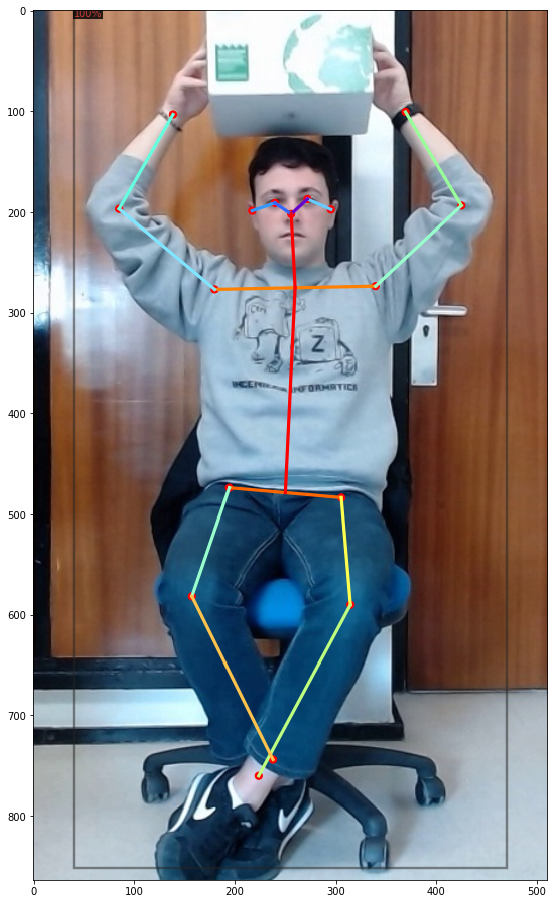

In [4]:
v = Visualizer(frame[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v2 = v.draw_instance_predictions(o["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

In [5]:
x

array([213.49094, 226.98407, 199.99782, 246.41414, 181.10745, 283.11545,
       150.34314, 354.3591 ,  71.00359, 307.94278, 115.80075, 255.04974,
       162.21709, 262.6059 , 131.45277, 186.5047 , 198.37865],
      dtype=float32)

In [6]:
y

array([169.78755, 157.37067, 160.60986, 166.00851, 167.08824, 229.17273,
       231.87206, 162.76932, 165.46864,  85.02875,  87.18821, 404.08902,
       395.99103, 492.6269 , 485.6086 , 634.07153, 620.57495],
      dtype=float32)

(900, 0)

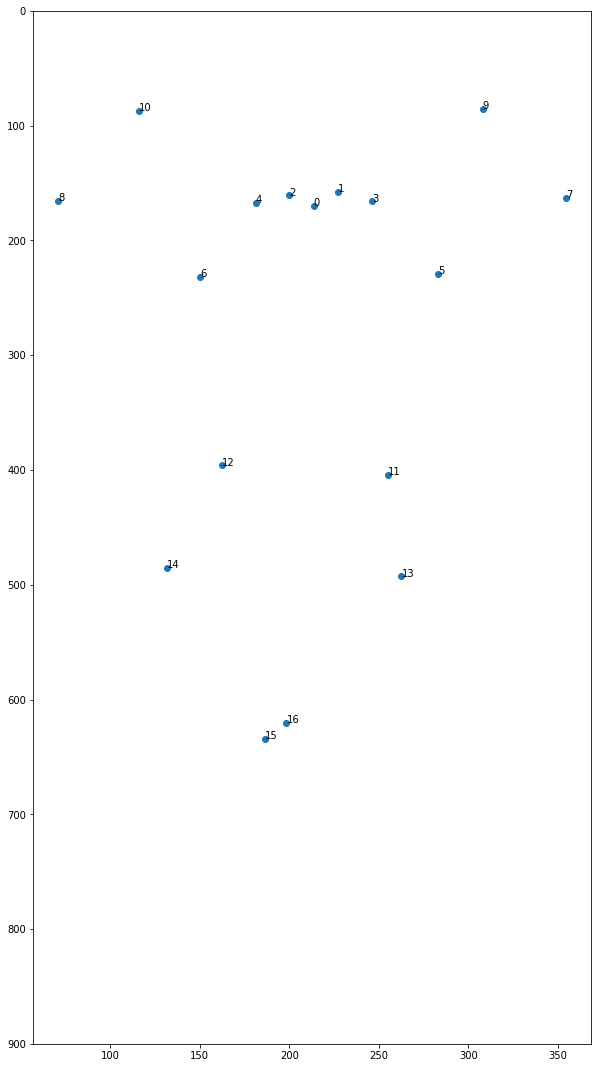

In [7]:
fig, ax = plt.subplots(figsize=(10,19))
ax.scatter(x, y)

for i, txt in enumerate(range(len(x))):
    ax.annotate(i, (x[i], y[i]))
    
plt.ylim(900,0)

In [8]:
x

array([213.49094, 226.98407, 199.99782, 246.41414, 181.10745, 283.11545,
       150.34314, 354.3591 ,  71.00359, 307.94278, 115.80075, 255.04974,
       162.21709, 262.6059 , 131.45277, 186.5047 , 198.37865],
      dtype=float32)

In [9]:
class Posicion():
    
    def __init__(self,x,y):
        self.nariz = [x[0],y[0]]
        self.ojoI = [x[1],y[1]]
        self.ojoD = [x[2],y[2]]
        self.orejaI=[x[3],y[3]]
        self.orejaD=[x[4],y[4]]
        self.hombroI=[x[5],y[5]]
        self.hombroD=[x[6],y[6]]
        self.cuello = self.calcularPuntoMedio(self.hombroI,self.hombroD)
        self.angCuelloSupI = self.calcularAngulo(self.hombroI,self.cuello,self.nariz)
        self.angCuelloSupD = self.calcularAngulo(self.hombroD,self.cuello,self.nariz)
        self.codoI = [x[7],y[7]]
        self.codoD = [x[8],y[8]]
        self.manoI=[x[9],y[9]]
        self.manoD = [x[10],y[10]]
        self.angCodoI = self.calcularAngulo(self.hombroI,self.codoI,self.manoI)
        self.angCodoD = self.calcularAngulo(self.hombroD,self.codoD,self.manoD)
        self.angHombroI = self.calcularAngulo(self.cuello,self.hombroI,self.codoI)
        self.angHombroD = self.calcularAngulo(self.cuello,self.hombroD,self.codoD)
        self.caderaI = [x[11],y[11]]
        self.caderaD = [x[12],y[12]]
        self.cadera = self.calcularPuntoMedio(self.caderaI,self.caderaD)
        self.angCuelloInfI =self.calcularAngulo(self.hombroI,self.cuello,self.cadera)
        self.angCuelloInfD =self.calcularAngulo(self.hombroD,self.cuello,self.cadera)
        self.rodillaI = [x[13],y[13]]
        self.rodillaD = [x[14],y[14]]
        self.angCaderaI = self.calcularAngulo(self.cadera,self.caderaI,self.rodillaI)
        self.angCaderaD = self.calcularAngulo(self.cadera,self.caderaD,self.rodillaD)
        self.angCaderaTorsoI = self.calcularAngulo(self.cuello,self.cadera,self.caderaI)
        self.angCaderaTorsoD = self.calcularAngulo(self.cuello,self.cadera,self.caderaD)
        self.tobilloI = [x[15],y[15]]
        self.tobilloD = [x[16],y[16]]
        self.angRodillaI = self.calcularAngulo(self.caderaI,self.rodillaI,self.tobilloI)
        self.angRodillaD = self.calcularAngulo(self.caderaD,self.rodillaD,self.tobilloD)
        self.distAntebrazoI = self.calcularDistancia(self.manoI,self.codoI)
        self.distAntebrazoD = self.calcularDistancia(self.manoD,self.codoD)
        self.distBrazoI = self.calcularDistancia(self.codoI,self.hombroI)
        self.distBrazoD = self.calcularDistancia(self.codoD,self.hombroD)
        self.distCuello = self.calcularDistancia(self.nariz,self.cuello)
        self.distTronco = self.calcularDistancia(self.cuello,self.cadera)
        self.distMusloI = self.calcularDistancia(self.caderaI,self.rodillaI)
        self.distMusloD = self.calcularDistancia(self.caderaD,self.rodillaD)
        self.distPiernaI = self.calcularDistancia(self.rodillaI,self.tobilloI)
        self.distPiernaD = self.calcularDistancia(self.rodillaD,self.tobilloD)
        self.distHombros = self.calcularDistancia(self.hombroI,self.hombroD)
        self.distCadera = self.calcularDistancia(self.caderaI,self.caderaD)
        
    def calcularPuntoMedio(self,p1,p2):
        return [(p1[0]+p2[0])/2,(p1[1]+p2[1])/2]
    
    def calcularAngulo(self,p1,p2,p3):
        v1 = self.calcularVector(p1,p2)
        v2 = self.calcularVector(p3,p2)
        uv1 = v1 / np.linalg.norm(v1)
        uv2 = v2 / np.linalg.norm(v2)
        dp = np.dot(uv1, uv2)
        return math.degrees(np.arccos(dp))
    
    def calcularVector(self,p1,p2):
        return [p2[0]-p1[0],p2[1]-p1[1]]
    
    def calcularDistancia(self,p1,p2):
        return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
    
    def devuelveAngulos(self):
        return [self.angCuelloSupI,self.angCuelloSupD,self.angCodoI,self.angCodoD,self.angHombroI,self.angHombroD,
               self.angCuelloInfI,self.angCuelloInfD,self.angCaderaI,self.angCaderaD,self.angRodillaI,self.angRodillaD,
               self.angCaderaTorsoI,self.angCaderaTorsoD]

In [10]:
def obtenerFrame(vid,frame):
    vc = cv2.VideoCapture(vid)

    if (vc.isOpened()==False):
        print("Error")
    else:
        for i in range(frame):
            ret,frame = vc.read()

    o = predictor(frame)
    v = Visualizer(frame[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v2 = v.draw_instance_predictions(o["instances"].to("cpu"))
    imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(18, 16))
    plt.imshow(imVisualizer)
    plt.show()
    
    pkP = o.get("instances").pred_keypoints
    if len(pkP)>0:
        x = pkP[0][:,0].cpu().numpy()
        y = pkP[0][:,1].cpu().numpy()
    return [x,y]

In [11]:
a = Posicion(x,y)

In [12]:
vc = cv2.VideoCapture('../pruebas/videos-prueba/Videos/Josemi/sentado3-caja.webm')

if (vc.isOpened()==False):
    print("Error")

(grabbed, frame) = vc.read()
pos = []
error = []
i = 0
while(vc.isOpened()):
    ret,frame = vc.read()
    if ret == True:
        o = predictor(frame)
        pkP = o.get("instances").pred_keypoints
        if len(pkP)>0 and len(pkP[0])==17:
            x = pkP[0][:,0].cpu().numpy()
            y = pkP[0][:,1].cpu().numpy()
        else: 
            error.append(i)
        pos.append(Posicion(x,y))
    else:
        break
    print("Frame " + str(i),end="\r")
    i+=1
vc.release()
cv2.destroyAllWindows()
if len(error) > 0:
    for j in error:
        print("El frame " + str(j) + " ha dado error.")

In [13]:
def comparaPosiciones(pos1,pos2):
    res=0.0
    ang1 = pos1.devuelveAngulos()
    ang2 = pos2.devuelveAngulos()
    for i in range(len(ang1)):
        res+= abs(ang1[i]-ang2[i])
    return res

In [14]:
#Penalización si los brazos están en sentidos contrarios
#Diferencia para designar si una brazo está al mismo nivel (0), está arriba (1) o abajo del codo (2)
def compararBrazos(pos1,pos2,penalizacion = 100,diferenciaPena = 5):
    res=0.0
    
    res+= abs(pos1.angCodoD-pos2.angCodoD)
    bD1 = 0
    
    #Si la diferencia de altura es superior a la establecida se comprueba si está por encima o por debajo
    if abs(pos1.manoD[1]*100/pos1.codoD[1]-100)>diferenciaPena:
        if pos1.manoD[1] > pos1.codoD[1]:
            bD1 = 1
        else: 
            bD1 = 2
    bD2 = 0
    if abs(pos2.manoD[1]*100/pos2.codoD[1]-100)>diferenciaPena:
        if pos2.manoD[1] > pos2.codoD[1]:
            bD2 = 1
        else: 
            bD2 = 2
    #Penalizamos
    if (bD1 == 1 and  bD2==2) or (bD1 == 2 and  bD2==1):
        res+=penalizacion
        print("Penalizado brazo derecho")
    
    res+= abs(pos1.angCodoI-pos2.angCodoI)
    
    bI1 = 0
    if abs(pos1.manoI[1]*100/pos1.codoI[1]-100)>diferenciaPena:
        if pos1.manoI[1] > pos1.codoI[1]:
            bI1 = 1
        else: 
            bI1 = 2
    bI2 = 0
    if abs(pos2.manoI[1]*100/pos2.codoI[1]-100)>diferenciaPena:
        if pos2.manoI[1] > pos2.codoI[1]:
            bI2 = 1
        else: 
            bI2 = 2
    #Penalizamos
    if (bI1 == 1 and  bI2==2) or (bI1 == 2 and  bI2==1):
        res+=penalizacion
        print("Penalizado brazo izquierdo")
    return res

In [15]:
def compararPiernas(pos1,pos2):
    partes = ["D","I"]
    zonas = ["angRodilla","angCadera"]
    res = 0.0
    for i in partes:
        for j in zonas:
            res+=abs(eval("pos1."+j+i)-eval("pos2."+j+i))
    return res

In [16]:
def compararTorso(pos1,pos2):
    partes=["D","I"]
    zonas=["angCaderaTorso","angHombro","angCuelloSup"]
    res = 0.0
    for i in partes:
        for j in zonas:
            res+=abs(eval("pos1."+j+i)-eval("pos2."+j+i))
    return res

In [17]:
def compararPosiciones2(pos1,pos2,penalizacion = 100,diferenciaPena = 5,pesoBrazos=1,pesoPiernas=1,pesoTorso=1):
    return pesoBrazos*compararBrazos(pos1,pos2,penalizacion,diferenciaPena)+pesoPiernas*compararPiernas(pos1,pos2)+pesoTorso*compararTorso(pos1,pos2)

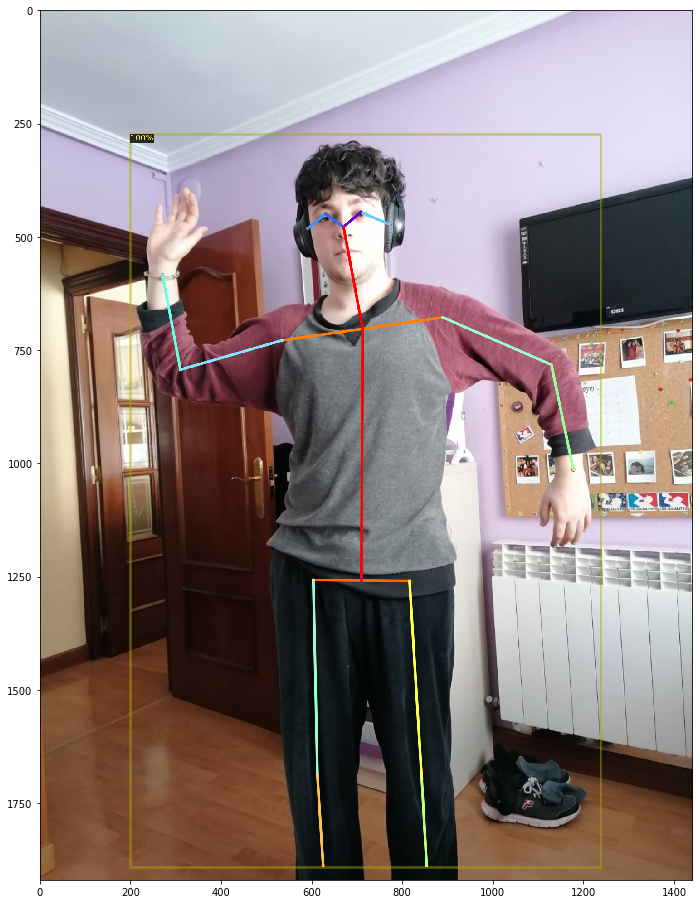

In [19]:
frame = cv2.imread("../pruebas/PruebaBrazos.jpeg")
o = predictor(frame)
v = Visualizer(frame[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v2 = v.draw_instance_predictions(o["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

In [20]:
pkP = o.get("instances").pred_keypoints
if len(pkP)>0:
    x = pkP[0][:,0].cpu().numpy()
    y = pkP[0][:,1].cpu().numpy()

In [21]:
a = Posicion(x,y)

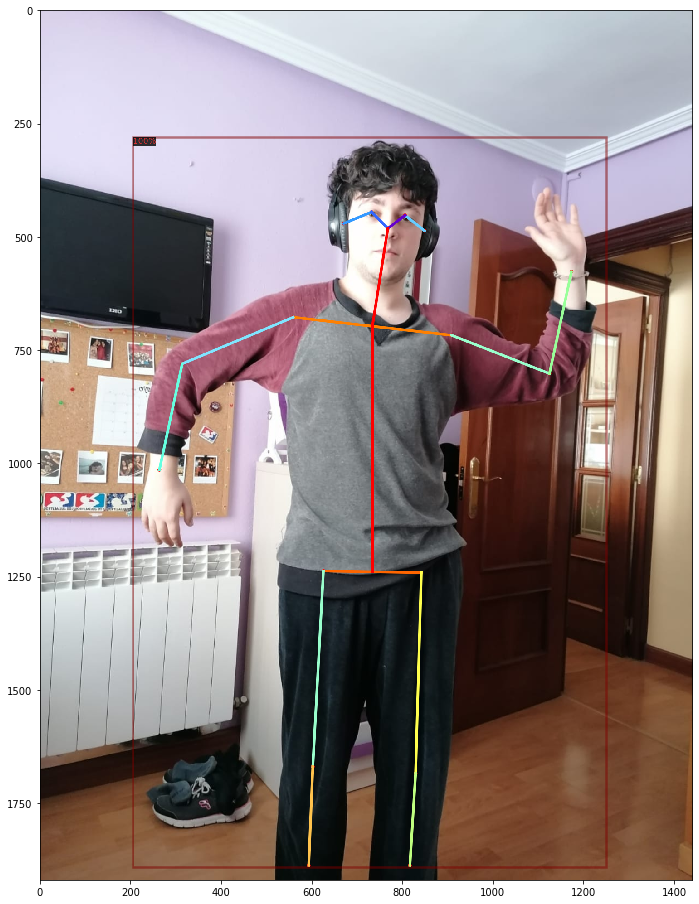

In [22]:
frame = cv2.imread("../pruebas/PruebaBrazos2.png")
o2 = predictor(frame)
v = Visualizer(frame[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v2 = v.draw_instance_predictions(o2["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

In [23]:
pkP2 = o2.get("instances").pred_keypoints
if len(pkP2)>0:
    x2 = pkP2[0][:,0].cpu().numpy()
    y2 = pkP2[0][:,1].cpu().numpy()

In [24]:
b = Posicion(x2,y2)

In [25]:
compararPosiciones2(a,b,pesoBrazos=1,pesoPiernas=0,pesoTorso=0)

Penalizado brazo derecho
Penalizado brazo izquierdo


284.8131158676354

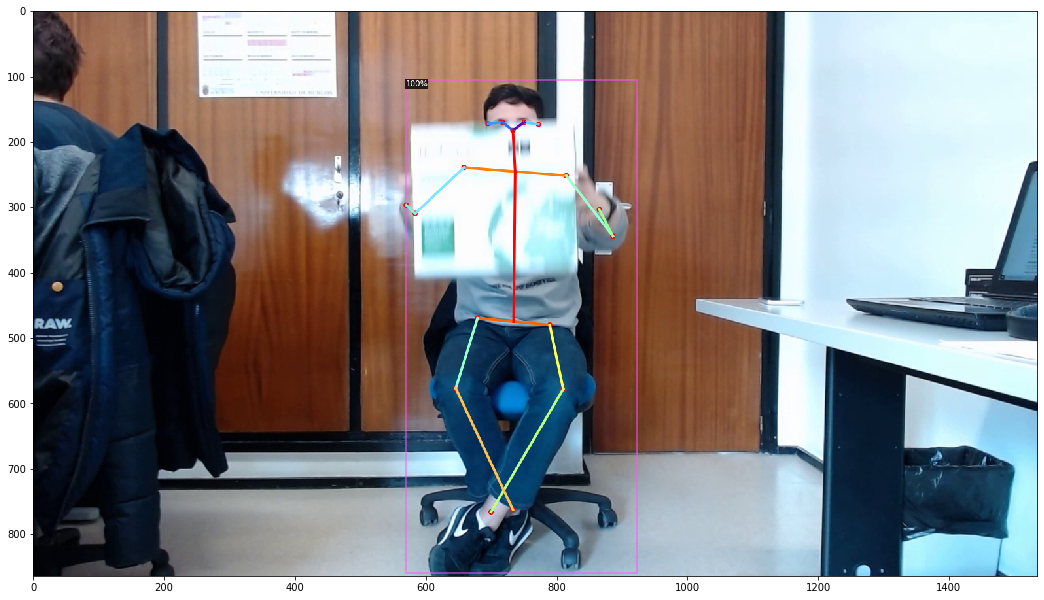

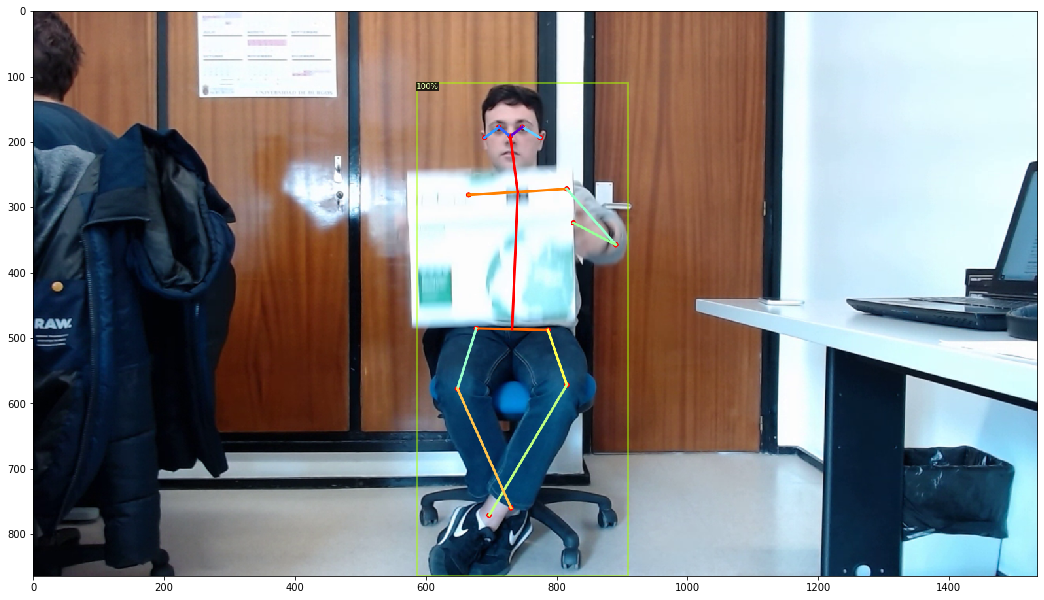

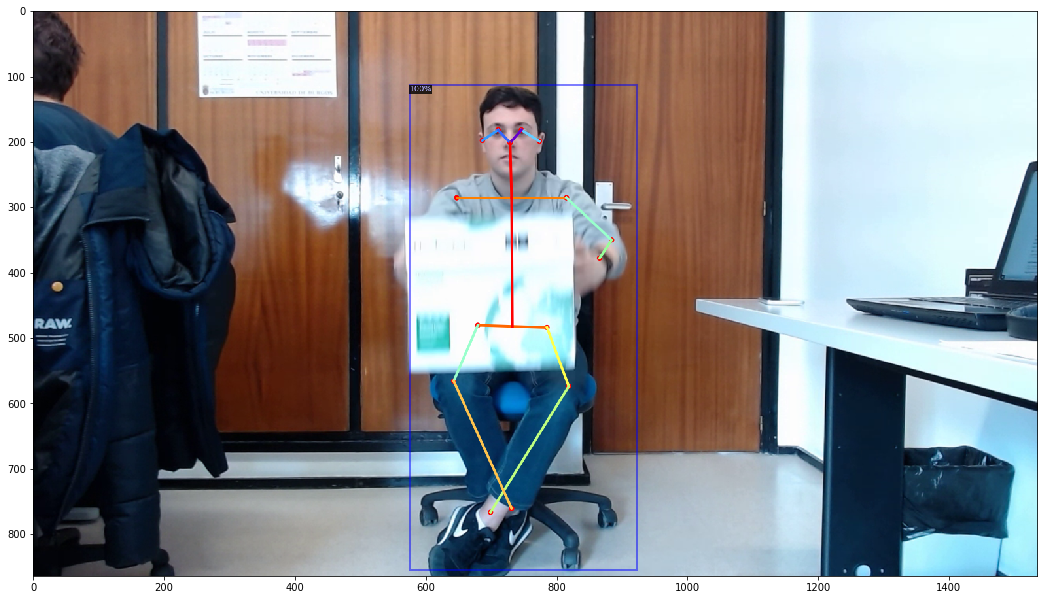

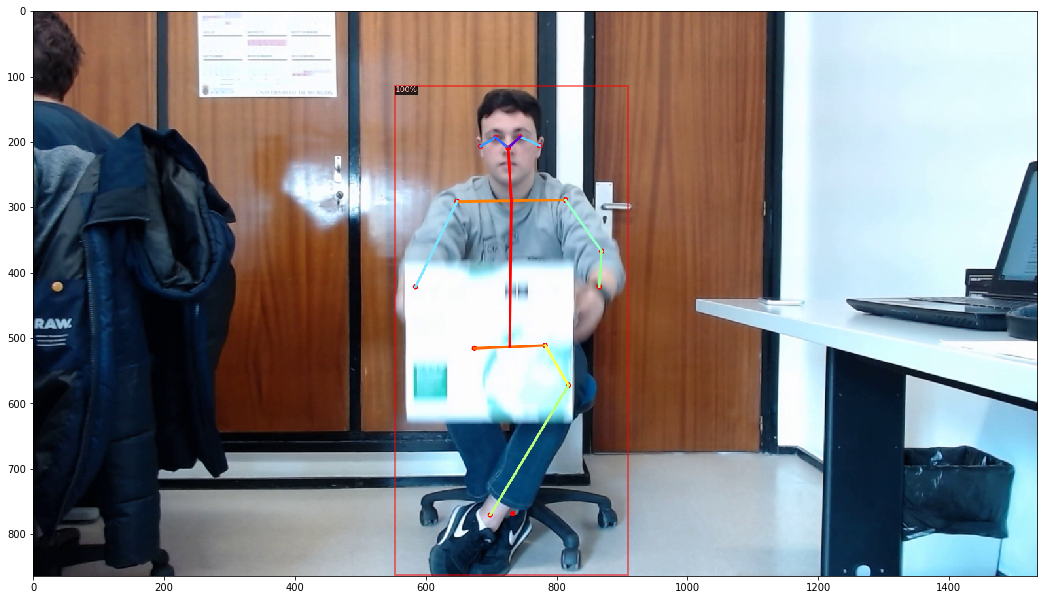

In [26]:
frames=[247,248,249,250]
for i in frames:
    obtenerFrame('../pruebas/videos-prueba/Videos/Josemi/sentado3-caja.webm',i)

In [27]:
compararPosiciones2(pos[248],pos[249],pesoBrazos=1,pesoPiernas=0,pesoTorso=0)

99.67288225610437

In [28]:
sol = []
for i in range(len(pos)):
    if i+1 < len(pos):
        print(i)
        sol.append([i,i+1,compararPosiciones2(pos[i],pos[i+1])])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
Penalizado brazo izquierdo
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270

In [29]:
sol

[[0, 1, 5.6088776901243875],
 [1, 2, 22.741540416153583],
 [2, 3, 25.48965889819756],
 [3, 4, 29.101053101290375],
 [4, 5, 29.89318242598253],
 [5, 6, 37.279871945886384],
 [6, 7, 24.596609663530487],
 [7, 8, 52.81028153954213],
 [8, 9, 53.94560533858775],
 [9, 10, 44.81882657483571],
 [10, 11, 47.179653080072],
 [11, 12, 54.75739034931162],
 [12, 13, 38.362322531344034],
 [13, 14, 153.73128180398933],
 [14, 15, 208.23403685735212],
 [15, 16, 98.94311990706778],
 [16, 17, 66.72660438320446],
 [17, 18, 86.70104516687783],
 [18, 19, 69.83872795604658],
 [19, 20, 61.246890390154135],
 [20, 21, 46.52166091191687],
 [21, 22, 32.81748139414802],
 [22, 23, 13.766430897159722],
 [23, 24, 14.233671610091704],
 [24, 25, 18.2712462152996],
 [25, 26, 16.884959350746016],
 [26, 27, 29.672257982326983],
 [27, 28, 10.817492516670256],
 [28, 29, 6.662698807257968],
 [29, 30, 7.6189816828629375],
 [30, 31, 5.7671863495695845],
 [31, 32, 13.815470695366358],
 [32, 33, 14.334771084818641],
 [33, 34, 8.11

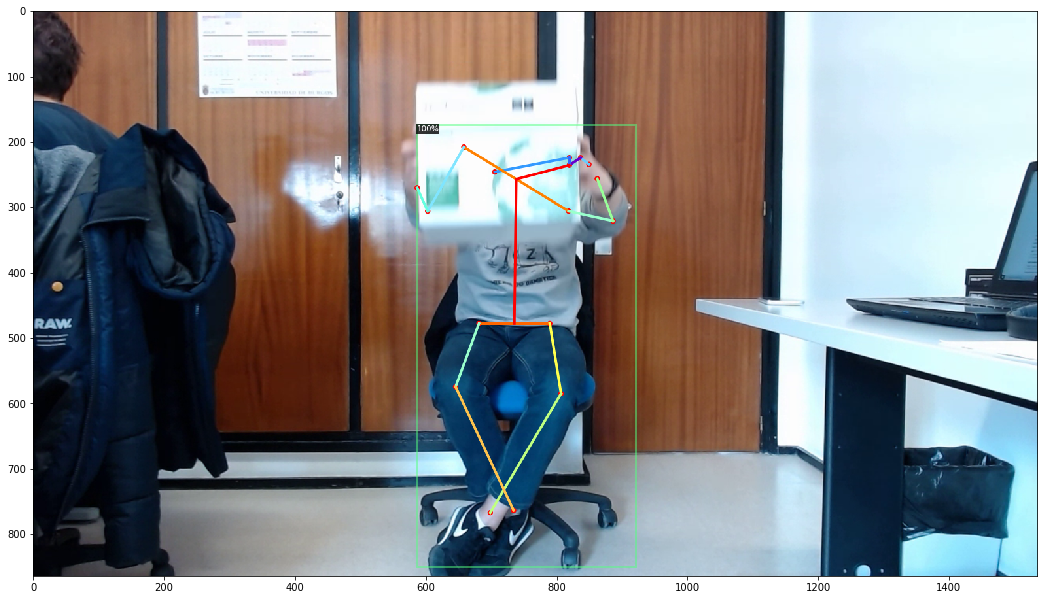

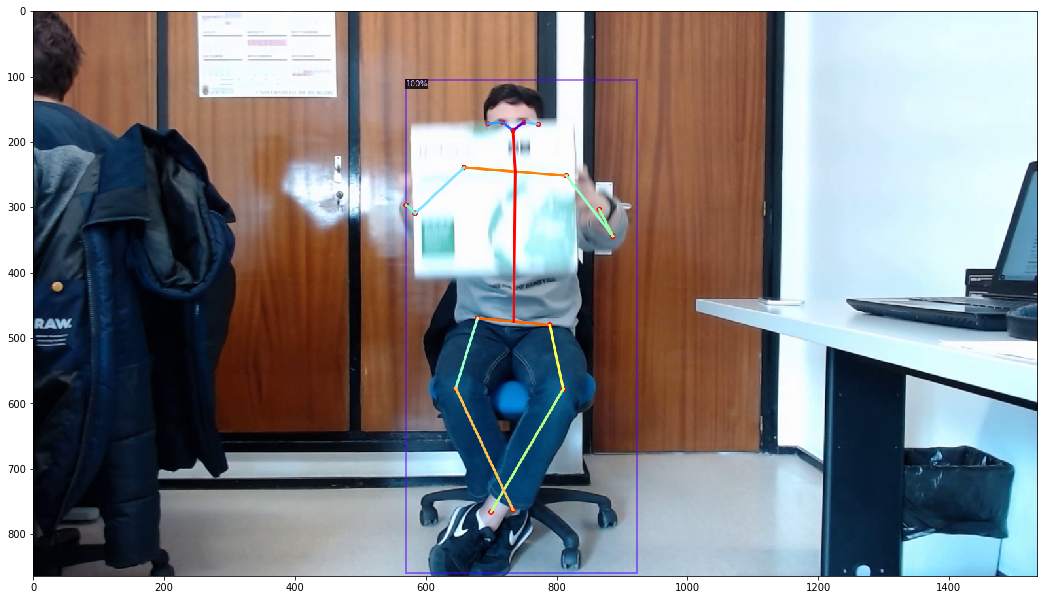

In [30]:
frames=[246,247]
for i in frames:
    obtenerFrame('../pruebas/videos-prueba/Videos/Josemi/sentado3-caja.webm',i)